In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [61]:
df = pd.read_csv('/home/arog/Documents/GitHub/HGMB_Project/datasets/treated/post_crossref.csv')

In [62]:
df.iloc[[197]]



,Unique ID,UP name,NCBI taxonomy name,Assembly ID (UP matched),Present in GFKB v3 (Y/N),Present in GFKB_epilepsy v3 (Y/N),Present in GFKB v5 (Y/N),In BiGG Models (Y/N),BiGG Model Link
197,UP000002716_ CP000034,Shigella dysenteriae serotype 1 (strain Sd197),Shigella dysenteriae Sd197,GCA_000012005.1,N,N,Y,Y,http://bigg.ucsd.edu/models/iSDY_1059


In [63]:
# See the proportions For a Ven Diagram

# Count unique combinations
combo_counts = df.groupby(['Present in GFKB v3 (Y/N)', 'Present in GFKB_epilepsy v3 (Y/N)', 'Present in GFKB v5 (Y/N)']).size().reset_index(name='count')

# Calculate proportion
total = combo_counts['count'].sum()
combo_counts['proportion'] = combo_counts['count'] / total

combo_counts

,Present in GFKB v3 (Y/N),Present in GFKB_epilepsy v3 (Y/N),Present in GFKB v5 (Y/N),count,proportion
0,N,N,Y,38,0.170404
1,N,Y,N,24,0.107623
2,Y,N,N,1,0.004484
3,Y,Y,N,160,0.717489


In [64]:
# See the proportions For a Ven Diagram
df_has_models = df[df['In BiGG Models (Y/N)'] == 'Y']
# Count unique combinations 
combo_counts_has_models = df_has_models.groupby(['Present in GFKB v3 (Y/N)','Present in GFKB_epilepsy v3 (Y/N)', 'Present in GFKB v5 (Y/N)']).size().reset_index(name='count')

# Calculate proportion
total = combo_counts_has_models['count'].sum()
combo_counts_has_models['proportion'] = combo_counts_has_models['count'] / total

combo_counts_has_models

,Present in GFKB v3 (Y/N),Present in GFKB_epilepsy v3 (Y/N),Present in GFKB v5 (Y/N),count,proportion
0,N,N,Y,4,0.285714
1,Y,N,N,1,0.071429
2,Y,Y,N,9,0.642857


Decided to remove the epilepsy variable from this study because of lack of model representativity 

In [65]:
df = df[~((df['Present in GFKB v3 (Y/N)'] == 'N') & (df['Present in GFKB_epilepsy v3 (Y/N)'] == 'Y'))]
df.drop('Present in GFKB_epilepsy v3 (Y/N)', axis=1, inplace=True)
df

,Unique ID,UP name,NCBI taxonomy name,Assembly ID (UP matched),Present in GFKB v3 (Y/N),Present in GFKB v5 (Y/N),In BiGG Models (Y/N),BiGG Model Link
0,UP000001902_CP001859,Acidaminococcus fermentans (strain ATCC 25085 ...,Acidaminococcus fermentans DSM 20731,GCA_000025305.1,Y,N,N,NaN
1,UP000007093_CP003058,Acidaminococcus intestini (strain RyC-MR95),Acidaminococcus intestini RyC-MR95,GCA_000230275.1,Y,N,N,NaN
2,UP000006306_CP003872,Acidovorax sp KKS102,Acidovorax sp. KKS102,GCA_000302535.1,Y,N,N,NaN
3,*UP000015924_AP013105,Adlercreutzia equolifaciens DSM 19450,Adlercreutzia equolifaciens DSM 19450,GCA_000478885.1,Y,N,N,NaN
4,UP000001477_CP001107,Agathobacter rectalis (strain ATCC 33656 / DSM...,Eubacterium rectale ATCC 33656,GCA_000020605.1,Y,N,N,NaN
...,...,...,...,...,...,...,...,...
217,UP000005436_CP003191,Tannerella forsythia (strain ATCC 43037 / JCM ...,Tannerella forsythia 92A2,GCA_000238215.1,Y,N,N,NaN
218,UP000006852_CP002631,Treponema succinifaciens (strain ATCC 33096 / ...,Treponema succinifaciens DSM 2489,GCA_000195275.1,Y,N,N,NaN
219,UP000007968_CP001820,Veillonella parvula (strain ATCC 10790 / DSM 2...,Veillonella parvula DSM 2008,GCA_000024945.1,Y,N,N,NaN
221,*UP000008959_FP929060,butyrate-producing bacterium SM4/1,butyrate-producing bacterium SM4/1,GCA_000210675.1,Y,N,N,NaN


In [66]:
# See the proportions For a Ven Diagram

# Count unique combinations without 'Present in GFKB_epilepsy v3 (Y/N)'
combo_counts = df.groupby(['Present in GFKB v3 (Y/N)', 'Present in GFKB v5 (Y/N)']).size().reset_index(name='count')

# Calculate proportion
total = combo_counts['count'].sum()
combo_counts['proportion'] = combo_counts['count'] / total

combo_counts

,Present in GFKB v3 (Y/N),Present in GFKB v5 (Y/N),count,proportion
0,N,Y,38,0.190955
1,Y,N,161,0.809045


In [67]:
# See the proportions For a Ven Diagram
df_has_models = df[df['In BiGG Models (Y/N)'] == 'Y']
# Count unique combinations without 'Present in GFKB_epilepsy v3 (Y/N)'
combo_counts_has_models = df_has_models.groupby(['Present in GFKB v3 (Y/N)', 'Present in GFKB v5 (Y/N)']).size().reset_index(name='count')

# Calculate proportion
total = combo_counts_has_models['count'].sum()
combo_counts_has_models['proportion'] = combo_counts_has_models['count'] / total

combo_counts_has_models

,Present in GFKB v3 (Y/N),Present in GFKB v5 (Y/N),count,proportion
0,N,Y,4,0.285714
1,Y,N,10,0.714286


In [68]:
10*0.19
print(3/13)
print(10/13)

0.23076923076923078
0.7692307692307693


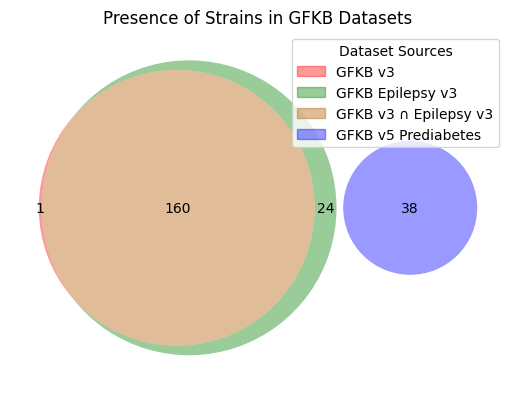

In [81]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define Venn diagram data
venn = venn3(subsets={
    '100': 1,
    '010': 24,
    '001': 38,
    '110': 160,
    '101': 0,
    '011': 0,
    '111': 0
}, set_labels=('', '', ''))  # Hide default labels

# Set region labels
venn.get_label_by_id('100').set_text('1')
venn.get_label_by_id('010').set_text('24')
venn.get_label_by_id('001').set_text('38')
venn.get_label_by_id('110').set_text('160')

# Optional: Hide unused labels
for region in ['101', '011', '111']:
    if venn.get_label_by_id(region):
        venn.get_label_by_id(region).set_text('')

# Create custom legend
legend_labels = [
    mpatches.Patch(color=venn.get_patch_by_id('100').get_facecolor(), label='GFKB v3'),
    mpatches.Patch(color=venn.get_patch_by_id('010').get_facecolor(), label='GFKB Epilepsy v3'),
    mpatches.Patch(color=venn.get_patch_by_id('110').get_facecolor(), label='GFKB v3 ∩ Epilepsy v3'),
    mpatches.Patch(color=venn.get_patch_by_id('001').get_facecolor(), label='GFKB v5 Prediabetes')
]

plt.legend(handles=legend_labels, loc='upper right', title='Dataset Sources')
plt.title("Presence of Strains in GFKB Datasets")
plt.show()

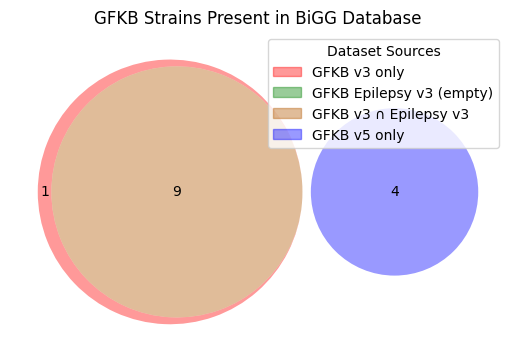

In [80]:

from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define Venn diagram data
venn = venn3(subsets={
    '100': 1,   # GFKB v3 only
    '010': 0,   # Epilepsy only
    '001': 4,   # GFKB v5 only
    '110': 9,   # GFKB v3 and Epilepsy
    '101': 0,
    '011': 0,
    '111': 0
}, set_labels=('', '', ''))  # Hide default labels

# Set region labels
venn.get_label_by_id('100').set_text('1')
venn.get_label_by_id('001').set_text('4')
venn.get_label_by_id('110').set_text('9')

# Hide unused region labels
for region in ['010', '101', '011', '111']:
    label = venn.get_label_by_id(region)
    if label:
        label.set_text('')

# Create custom legend using actual colors from the patches
legend_labels = [
    mpatches.Patch(color=venn.get_patch_by_id('100').get_facecolor(), label='GFKB v3 only'),
    mpatches.Patch(color=(0.0, 0.5, 0.0, 0.4), label='GFKB Epilepsy v3 (empty)'),  # Custom color used intentionally
    mpatches.Patch(color=venn.get_patch_by_id('110').get_facecolor(), label='GFKB v3 ∩ Epilepsy v3'),
    mpatches.Patch(color=venn.get_patch_by_id('001').get_facecolor(), label='GFKB v5 only')
]

plt.legend(handles=legend_labels, loc='upper right', title='Dataset Sources')
plt.title("GFKB Strains Present in BiGG Database")
plt.show()



Trying to chose what is the best combinations of models

In [ ]:
target_healthy = 161 / (161 + 38)       # ≈ 0.809
target_prediabetes = 38 / (161 + 38)    # ≈ 0.191
max_healthy = 10
max_prediabetes = 4

results = []

for total in range(12, max_healthy + max_prediabetes + 1):  # 12 to 14
    for healthy in range(0, total + 1):
        prediabetes = total - healthy
        if healthy <= max_healthy and prediabetes <= max_prediabetes:
            healthy_ratio = healthy / total
            prediabetes_ratio = prediabetes / total
            diff_healthy = abs(healthy_ratio - target_healthy)
            diff_prediabetes = abs(prediabetes_ratio - target_prediabetes)
            total_diff = diff_healthy + diff_prediabetes  # sum of both diffs
            results.append({
                "Total models": total,
                "Healthy models": healthy,
                "Pre-diabetes models": prediabetes,
                "Healthy proportion": round(healthy_ratio, 3),
                "Prediabetes proportion": round(prediabetes_ratio, 3),
                "Total deviation": round(total_diff, 3)
            })


display = pd.DataFrame(results)
display.sort_values(by="Total deviation", inplace=True)
display


,Total models,Healthy models,Pre-diabetes models,Healthy proportion,Prediabetes proportion,Total deviation
2,12,10,2,0.833,0.167,0.049
4,13,10,3,0.769,0.231,0.080
1,12,9,3,0.750,0.250,0.118
5,14,10,4,0.714,0.286,0.190
3,13,9,4,0.692,0.308,0.233
0,12,8,4,0.667,0.333,0.285


Decided that the second option is the best to balance number of models and proportion representativity. So mannualy i will choose one of the prediabetes models to stay behind.
The chosen model is Escherichia coli IAI39 beacause there is already a Ecoli species (SE11) that is more relevant for the study.
These are the models that will be used for simulations:

In [ ]:
df = df[(df["NCBI taxonomy name"] != 'Escherichia coli IAI39') & (df["In BiGG Models (Y/N)"] == 'Y')]
df = df.drop(columns=["In BiGG Models (Y/N)"])
df

,Unique ID,UP name,NCBI taxonomy name,Assembly ID (UP matched),Present in GFKB v3 (Y/N),Present in GFKB v5 (Y/N),BiGG Model Link
104,UP000002032_CP010816,Escherichia coli (strain B / BL21-DE3),Escherichia coli,GCA_000023665.1,Y,N,http://bigg.ucsd.edu/models/iEC1356_Bl21DE3
105,UP000008199_ AP009240,Escherichia coli (strain SE11),Escherichia coli SE11,GCA_000010385.1,N,Y,http://bigg.ucsd.edu/models/iECSE_1348
106,UP000007011_CP000970,Escherichia coli (strain SMS-3-5 / SECEC),Escherichia coli SMS-3-5,GCA_000019645.1,Y,N,http://bigg.ucsd.edu/models/iEcSMS35_1347
107,UP000001952_CP000243,Escherichia coli (strain UTI89 / UPEC),Escherichia coli UTI89,GCA_000013265.1,Y,N,http://bigg.ucsd.edu/models/iUTI89_1310
111,UP000007097_CP007394,Escherichia coli O17:K52:H18 (strain UMN026 / ...,Escherichia coli,GCA_000026325.2,Y,N,http://bigg.ucsd.edu/models/iECUMN_1333
112,UP000032727_AP009378,Escherichia coli O25b:H4-ST131,Escherichia coli SE15,GCA_000285655.3,Y,N,http://bigg.ucsd.edu/models/iECSF_1327
113,UP000001410_AE014075,Escherichia coli O6:H1 (strain CFT073 / ATCC 7...,Escherichia coli CFT073,GCA_000007445.1,Y,N,http://bigg.ucsd.edu/models/ic_1306
114,UP000006877_CP010371,Escherichia coli O78:H11 (strain H10407 / ETEC),Escherichia coli,GCA_000210475.1,Y,N,http://bigg.ucsd.edu/models/iETEC_1333
116,UP000008614_CU651637,Escherichia coli O83:H1 (strain NRG 857C / AIEC),Escherichia coli LF82,GCA_000183345.1,Y,N,http://bigg.ucsd.edu/models/iNRG857_1313
117,UP000008464_CP002729,Escherichia coli UMNK88,Escherichia coli UMNK88,GCA_000212715.2,Y,N,http://bigg.ucsd.edu/models/iUMNK88_1353


In [ ]:
# Now safely add the new column
df['BiGG ID'] = df['BiGG Model Link'].str.extract(r'/models/([^/]+)$')

df[["UP name", "Present in GFKB v3 (Y/N)", "Present in GFKB v5 (Y/N)"]].to_csv("/home/arog/Documents/GitHub/HGMB_Project/datasets/strain_list.csv", index=False)
df[["UP name", "Present in GFKB v3 (Y/N)", "Present in GFKB v5 (Y/N)", "BiGG ID"]]

,UP name,Present in GFKB v3 (Y/N),Present in GFKB v5 (Y/N),BiGG ID
104,Escherichia coli (strain B / BL21-DE3),Y,N,iEC1356_Bl21DE3
105,Escherichia coli (strain SE11),N,Y,iECSE_1348
106,Escherichia coli (strain SMS-3-5 / SECEC),Y,N,iEcSMS35_1347
107,Escherichia coli (strain UTI89 / UPEC),Y,N,iUTI89_1310
111,Escherichia coli O17:K52:H18 (strain UMN026 / ...,Y,N,iECUMN_1333
112,Escherichia coli O25b:H4-ST131,Y,N,iECSF_1327
113,Escherichia coli O6:H1 (strain CFT073 / ATCC 7...,Y,N,ic_1306
114,Escherichia coli O78:H11 (strain H10407 / ETEC),Y,N,iETEC_1333
116,Escherichia coli O83:H1 (strain NRG 857C / AIEC),Y,N,iNRG857_1313
117,Escherichia coli UMNK88,Y,N,iUMNK88_1353


In [ ]:
df.to_csv("/home/arog/Documents/GitHub/HGMB_Project/datasets/treated/models_final.csv", index=False)
df

,Unique ID,UP name,NCBI taxonomy name,Assembly ID (UP matched),Present in GFKB v3 (Y/N),Present in GFKB v5 (Y/N),BiGG Model Link,BiGG ID
104,UP000002032_CP010816,Escherichia coli (strain B / BL21-DE3),Escherichia coli,GCA_000023665.1,Y,N,http://bigg.ucsd.edu/models/iEC1356_Bl21DE3,iEC1356_Bl21DE3
105,UP000008199_ AP009240,Escherichia coli (strain SE11),Escherichia coli SE11,GCA_000010385.1,N,Y,http://bigg.ucsd.edu/models/iECSE_1348,iECSE_1348
106,UP000007011_CP000970,Escherichia coli (strain SMS-3-5 / SECEC),Escherichia coli SMS-3-5,GCA_000019645.1,Y,N,http://bigg.ucsd.edu/models/iEcSMS35_1347,iEcSMS35_1347
107,UP000001952_CP000243,Escherichia coli (strain UTI89 / UPEC),Escherichia coli UTI89,GCA_000013265.1,Y,N,http://bigg.ucsd.edu/models/iUTI89_1310,iUTI89_1310
111,UP000007097_CP007394,Escherichia coli O17:K52:H18 (strain UMN026 / ...,Escherichia coli,GCA_000026325.2,Y,N,http://bigg.ucsd.edu/models/iECUMN_1333,iECUMN_1333
112,UP000032727_AP009378,Escherichia coli O25b:H4-ST131,Escherichia coli SE15,GCA_000285655.3,Y,N,http://bigg.ucsd.edu/models/iECSF_1327,iECSF_1327
113,UP000001410_AE014075,Escherichia coli O6:H1 (strain CFT073 / ATCC 7...,Escherichia coli CFT073,GCA_000007445.1,Y,N,http://bigg.ucsd.edu/models/ic_1306,ic_1306
114,UP000006877_CP010371,Escherichia coli O78:H11 (strain H10407 / ETEC),Escherichia coli,GCA_000210475.1,Y,N,http://bigg.ucsd.edu/models/iETEC_1333,iETEC_1333
116,UP000008614_CU651637,Escherichia coli O83:H1 (strain NRG 857C / AIEC),Escherichia coli LF82,GCA_000183345.1,Y,N,http://bigg.ucsd.edu/models/iNRG857_1313,iNRG857_1313
117,UP000008464_CP002729,Escherichia coli UMNK88,Escherichia coli UMNK88,GCA_000212715.2,Y,N,http://bigg.ucsd.edu/models/iUMNK88_1353,iUMNK88_1353
